In [1]:
import pyart
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



C:\Users\Admin\anaconda3\envs\pyart_env\lib\site-packages\wradlib\io\radolan.py:939: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "add_offset": np.float(0),
C:\Users\Admin\anaconda3\envs\pyart_env\lib\site-packages\wradlib\io\radolan.py:948: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  "add_offset": np.float(0),
C:\Users\Admin\anaconda3

1800

In [8]:
C=0.989

In [9]:
radar.fields['reflectivity']['data']+C

masked_array(
  data=[[--, -9.990999221801758, -4.051000118255615, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [-28.17099952697754, -7.4710001945495605, -1.370999813079834,
         ..., --, --, --],
        ...,
        [--, -17.791000366210938, -12.720999717712402, ..., --, --, --],
        [--, -16.33099937438965, -10.990999221801758, ..., --, --, --],
        [--, -17.560998916625977, -9.660999298095703, ..., --, --, --]],
  mask=[[ True, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [5]:
lat_0=radar.latitude['data']

In [6]:
lon_0=radar.longitude['data']

In [7]:
grid_shape=(13,601,601)

In [8]:
grid=pyart.map.grid_from_radars(
            radar,
            grid_shape=grid_shape, #Number of points in the grid (z, y, x) (12,301,301)
            grid_limits=((0, 12000), (-300000, 300000), (-300000, 300000)), # min-max tuong duong z,y,x
            grid_origin = (lat_0,lon_0),
            fields=['reflectivity'])

In [9]:
grid.x['data']

array([-300000., -299000., -298000., -297000., -296000., -295000.,
       -294000., -293000., -292000., -291000., -290000., -289000.,
       -288000., -287000., -286000., -285000., -284000., -283000.,
       -282000., -281000., -280000., -279000., -278000., -277000.,
       -276000., -275000., -274000., -273000., -272000., -271000.,
       -270000., -269000., -268000., -267000., -266000., -265000.,
       -264000., -263000., -262000., -261000., -260000., -259000.,
       -258000., -257000., -256000., -255000., -254000., -253000.,
       -252000., -251000., -250000., -249000., -248000., -247000.,
       -246000., -245000., -244000., -243000., -242000., -241000.,
       -240000., -239000., -238000., -237000., -236000., -235000.,
       -234000., -233000., -232000., -231000., -230000., -229000.,
       -228000., -227000., -226000., -225000., -224000., -223000.,
       -222000., -221000., -220000., -219000., -218000., -217000.,
       -216000., -215000., -214000., -213000., -212000., -2110

In [10]:
for i in range(grid_shape[1]):
    geog = pyart.core.cartesian_to_geographic_aeqd(grid.x["data"][i],grid.y["data"][i],lon_0,lat_0, R=6370997.0)
    grid.x["data"][i] = geog[0]
    grid.y["data"][i] = geog[1]

In [11]:
grid.fields.keys()

dict_keys(['reflectivity', 'ROI'])

In [12]:
grid.z['data']

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000., 11000., 12000.])

In [13]:
Z_3km_dBZ=grid.fields['reflectivity']['data'][3]

In [24]:
from wradlib.trafo import idecibel,r_to_depth

In [25]:
Z_3km_mm6m3=idecibel(Z_3km_dBZ)

In [26]:
Z_3km_mm6m3

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [27]:
from wradlib.zr import  z_to_r

In [28]:
R_3km=z_to_r(Z_3km_mm6m3)

In [29]:
R_3km

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [30]:
R_CAPPI_3km=r_to_depth(R_3km,600)

In [33]:
R_CAPPI_3km

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [31]:
import pylab as pl

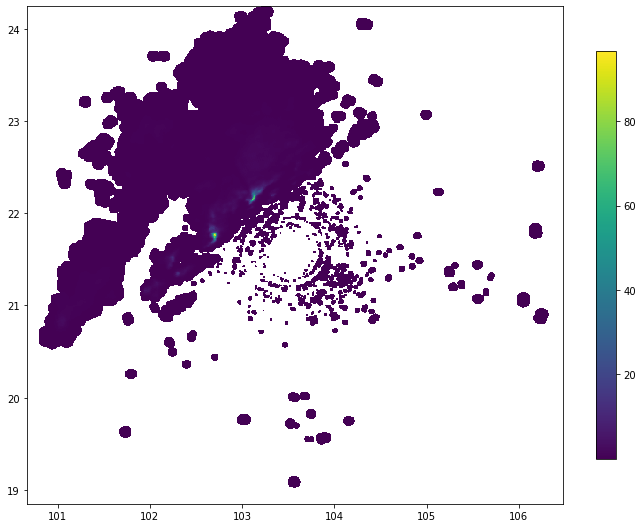

In [32]:
fig = pl.figure(figsize=(12,10))
ax = pl.subplot(111, aspect="equal")
pm = pl.pcolormesh(grid.x['data'], grid.y['data'],R_3km)
pl.colorbar(pm, shrink=0.75)

In [22]:
radar.time['data']

array([ 28.,  28.,  28., ..., 147., 147., 147.])